In [1]:
import sys
sys.path.append("..")
%cd ..

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021


In [2]:
from sklearn.linear_model import LinearRegression
from DataPrep.ImportData import importer
from sklearn.metrics import r2_score, mean_absolute_error
from Modelling import modelling
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
import statsmodels.api as sm
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from numpy import log
import numpy as np
import pandas as pd
from DataPrep.ImportData import importer
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")



In [3]:
m = modelling()

In [75]:
def ArimaM(label, alpha):
    #df = m.df.set_index("Start Date")
    print(f"ARIMA for label: {label}")
    df = m.df.sort_values("Start Date")
    df = df[df["Label"] == label]

    X_train,X_test, X_val,y_train,y_test, y_val = m.ttsplit(df,shuffle = False)

    result = adfuller(y_train.dropna(), autolag="t-stat")
    p = result[1]
    i=0
    while p >0.05:
        i+=1
        y_train = y_train.diff()
        result = adfuller(y_train.dropna(), autolag="t-stat")
        p = result[1]
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print("Number of diff %f" % i)
    
    MA=0
    ac = acf(y_train.dropna(),fft=False)
    while abs(ac[MA])>alpha:
        MA+=1
    print(f"MA={MA}")

    AR=0
    pac = pacf(y_train.dropna())
    while abs(pac[AR])>alpha:
        AR+=1
    print(f"AR={AR}")
    
    ####### Modeller 
    model = ARIMA(y_train.dropna(), order=(MA,0,AR))
    model_fit = model.fit()

    y_pred = model_fit.predict(start=y_test.index.min(),end=y_test.index.max())
    RMSE = rmse(y_test,y_pred)
    print()



    return RMSE
errors = []
for i in range(8):
    errors.append(ArimaM(i,0.1))
errors


ARIMA for label: 0
ADF Statistic: -14.473848
p-value: 0.000000
Number of diff 1.000000
MA=2
AR=8

ARIMA for label: 1
ADF Statistic: -14.597892
p-value: 0.000000
Number of diff 1.000000
MA=2
AR=8

ARIMA for label: 2
ADF Statistic: -14.782925
p-value: 0.000000
Number of diff 1.000000
MA=2
AR=8

ARIMA for label: 3
ADF Statistic: -4.417657
p-value: 0.000276
Number of diff 0.000000
MA=10
AR=2

ARIMA for label: 4
ADF Statistic: -3.235899
p-value: 0.017998
Number of diff 0.000000
MA=1
AR=1

ARIMA for label: 5
ADF Statistic: -3.603724
p-value: 0.005690
Number of diff 0.000000
MA=30
AR=5

ARIMA for label: 6
ADF Statistic: -4.584321
p-value: 0.000138
Number of diff 0.000000
MA=1
AR=1

ARIMA for label: 7
ADF Statistic: -3.536893
p-value: 0.007089
Number of diff 0.000000
MA=33
AR=4



[2.5266310189620644,
 3.072593436500175,
 2.8004866235400194,
 1.0339183229411824,
 0.8824827883127034,
 0.6110721036968279,
 0.472372737750256,
 0.8309044885768306]

In [4]:
def ArimaExo(label, alpha, exo):
    #df = m.df.set_index("Start Date")
    print(f"ARIMA for label: {label}")
    df = m.df.sort_values("Start Date")
    df = df[df["Label"] == label]

    X_train,X_test, X_val,y_train,y_test, y_val = m.ttsplit(df,shuffle = False)

    result = adfuller(y_train.dropna(), autolag="t-stat")
    p = result[1]
    i=0
    while p >0.05:
        i+=1
        y_train = y_train.diff()
        result = adfuller(y_train.dropna(), autolag="t-stat")
        p = result[1]
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print("Number of diff %f" % i)
    
    MA=0
    ac = acf(y_train.dropna(),fft=False)
    while abs(ac[MA])>alpha:
        MA+=1
    print(f"MA={MA}")

    AR=0
    pac = pacf(y_train.dropna())
    while abs(pac[AR])>alpha:
        AR+=1
    print(f"AR={AR}")
    
    ####### Modeller 
    if i==0:
        model = ARIMA(y_train.dropna(),X_train[exo], order=(MA,0,AR))
        model_fit = model.fit()

    else:
        model = ARIMA(y_train.dropna(),X_train[exo][i:], order=(MA,0,AR))
        model_fit = model.fit()

    
    y_pred = model_fit.forecast(steps=len(X_test[exo]),exog=X_test[exo])
    RMSE = rmse(y_test,y_pred)
    print()



    return RMSE
errors = []
for i in range(8):
    errors.append(ArimaExo(i,0.1,["Week_Day_5","Week_Day_6"]))
errors

ARIMA for label: 0
ADF Statistic: -14.473848
p-value: 0.000000
Number of diff 1.000000
MA=2
AR=8

ARIMA for label: 1
ADF Statistic: -14.597892
p-value: 0.000000
Number of diff 1.000000
MA=2
AR=8

ARIMA for label: 2
ADF Statistic: -14.782925
p-value: 0.000000
Number of diff 1.000000
MA=2
AR=8

ARIMA for label: 3
ADF Statistic: -4.417657
p-value: 0.000276
Number of diff 0.000000
MA=10
AR=2

ARIMA for label: 4
ADF Statistic: -3.235899
p-value: 0.017998
Number of diff 0.000000
MA=1
AR=1

ARIMA for label: 5
ADF Statistic: -3.603724
p-value: 0.005690
Number of diff 0.000000
MA=30
AR=5

ARIMA for label: 6
ADF Statistic: -4.584321
p-value: 0.000138
Number of diff 0.000000
MA=1
AR=1

ARIMA for label: 7
ADF Statistic: -3.536893
p-value: 0.007089
Number of diff 0.000000
MA=33
AR=4



[2.527794118078592,
 3.0729610112280605,
 2.8005597245089096,
 1.0264184857847534,
 0.9161453959059548,
 0.6146879285089762,
 0.4356187012142327,
 0.7681075347978235]

In [29]:
df = m.df.sort_values("Start Date")
X_train,X_test, X_val,y_train,y_test, y_val = m.ttsplit(df,shuffle = False)

In [30]:
Exo = ["Label", "Week_Day_5","Week_Day_6", '# Professional & Other Places', '# Food', '# Shop & Service',
       '# Travel & Transport', '# Outdoors & Recreation',
       '# Arts & Entertainment', '# Nightlife Spot', '# Residence',
       '# College & University', '# Event']

In [31]:
y_train = pd.DataFrame(y_train).set_index(X_train["Start Date"])
y_test = pd.DataFrame(y_test).set_index(X_test["Start Date"])
X_train = pd.DataFrame(X_train[Exo]).set_index(X_train["Start Date"])
X_test = pd.DataFrame(X_test[Exo]).set_index(X_test["Start Date"])
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [32]:
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train) 
y_test = scaler.transform(y_test)

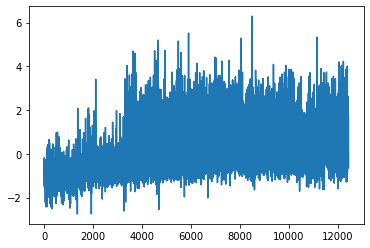

In [33]:
plt.plot(y_train)
plt.show()

In [20]:
result = adfuller(np.diff(y_train,axis=0))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -31.371675
p-value: 0.000000


In [21]:
y_train_diff = np.diff(y_train,axis=0)


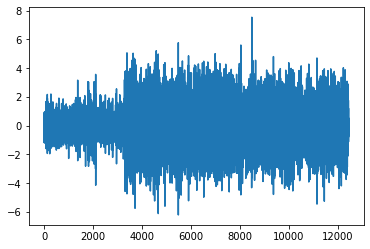

In [34]:
plt.plot(y_train_diff)
plt.show()

In [37]:
y_train_diff.shape
X_train.shape

(12444, 1)

In [59]:
acf(y_train_diff).round(3)
#np.abs(pacf(y_train_diff).round(3))>0.05

#2,17

array([ 1.   , -0.507, -0.002, -0.008,  0.017, -0.005,  0.004, -0.003,
        0.009, -0.006, -0.007,  0.009,  0.01 , -0.024,  0.022, -0.01 ,
        0.008, -0.004, -0.007,  0.004, -0.005,  0.01 , -0.002, -0.009,
        0.008,  0.007, -0.013,  0.004,  0.011, -0.014,  0.006, -0.002,
       -0.001, -0.006,  0.01 ,  0.001, -0.001, -0.005,  0.006,  0.003,
       -0.01 ])

In [63]:
# Sarimax 
model = sm.tsa.statespace.SARIMAX(y_train_diff,exog=X_train[1:], order=(2,0,17))
model_fit = model.fit(disp=True)



In [48]:
y_test.flatten()

array([0.23643594, 0.7960479 , 0.01959963, ..., 1.47964545, 1.22825433,
       0.99492834])

In [64]:
y_pred = model_fit.forecast(steps=len(X_test[Exo][1:].fillna(0)),exog=X_test[Exo][1:].fillna(0))
RMSE = rmse(np.diff(y_test,axis=0).flatten(),y_pred)
RMSE

1.216116399422791

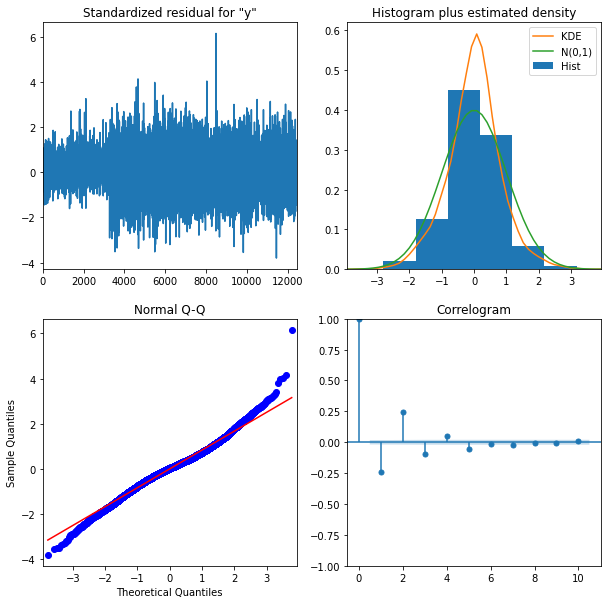

In [66]:
model_fit.plot_diagnostics(figsize=(10,10))
plt.show()

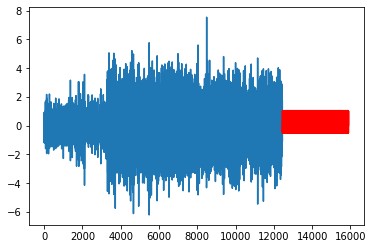

In [70]:
plt.plot(y_train_diff)
#plt.plot(np.diff(y_test,axis=0))
plt.plot(y_pred,c="r")
plt.show()

In [278]:
########### Taget herfra #### https://gist.github.com/ChadFulton/583020ea3740f91bec308212d48a12db


class ParallelAR(sm.tsa.statespace.MLEModel):
    def __init__(self, endog, order=(1, 0, 0)):
        # Handle endog
        #endog = np.asanyarray(endog)
        #if endog.ndim == 1:
        #    endog = endog[:, None]
        self.k_endog = endog.shape[0]
        
        # Construct a shadow SARIMAX model
        self._sarimax = sm.tsa.SARIMAX(endog[0], order=(1, 0, 0))

        # Initialize the model
        k_states = self._sarimax.k_states * self.k_endog
        k_posdef = self._sarimax.ssm.k_posdef * self.k_endog
        super(ParallelAR, self).__init__(endog, k_states=k_states, k_posdef=k_posdef)
        
        self.ssm.initialize_stationary()
        
        # Setup some indexes
        self._ix = {'design': [],
                    'transition': [],
                    'selection': [],
                    'state_cov': []}
        for i in range(self.k_endog):
            p = self.k_endog
            m = self._sarimax.k_states
            r = self._sarimax.ssm.k_posdef

            # Caches
            start = i * m
            end = (i + 1) * m

            self._ix['design'].append(np.s_['design', i, start:end])
            self._ix['transition'].append(np.s_['transition', start:end, start:end])
            self._ix['selection'].append(np.s_['selection', start:end, i * r:(i + 1) * r])

            start = i * r
            end = (i + 1) * r

            self._ix['state_cov'].append(np.s_['state_cov', start:end, start:end])


    @property
    def param_names(self):
        return self._sarimax.param_names

    @property
    def start_params(self):
        return self._sarimax.start_params

    def transform_params(self, params):
        return self._sarimax.transform_params(params)

    def untransform_params(self, params):
        return self._sarimax.untransform_params(params)

    def update(self, params, **kwargs):
        self._sarimax.update(params, **kwargs)

        for i in range(self.k_endog):
            # Fixed elements
            self[self._ix['design'][i]] = self._sarimax['design']
            self[self._ix['transition'][i]] = self._sarimax['transition']
            self[self._ix['selection'][i]] = self._sarimax['selection']
            self[self._ix['state_cov'][i]] = self._sarimax['state_cov']
        
mod = ParallelAR(test, order=(3, 0, 0))
mod.update(mod.start_params)
res = mod.fit()
print(res.summary())




TypeError: object of type 'RaggedTensor' has no len()

In [291]:
y_train_n = []
for cluster in range(8):
    y_train_n.append(y_train[X_train["Label"]==cluster])


y_train_n[0]

#import tensorflow as tf

tt = tf.ragged.constant([y_train_n[0],y_train_n[1],y_train_n[2],y_train_n[3],y_train_n[4],y_train_n[5],y_train_n[6],y_train_n[7]])
test = tf.add(tt,1)
tt[1].shape

#test[0].shape

TensorShape([2369, None])

In [177]:

from scipy.signal import lfilter
np.random.seed(1234)
nobs = 1000
k_endog = 3

phi = 0.8
sigma2 = 2

# Construct a long AR series
epsilon = np.random.normal(scale=sigma2**0.5, size=nobs * k_endog)
series = lfilter([1], [1, -phi], epsilon)

# Reshape into k_endog seperate series
endog = series.reshape(k_endog, nobs).T
endog

array([[ 0.66671   , -2.11036048,  1.51003562],
       [-1.15092598, -3.97958336,  3.49492719],
       [ 1.10541284, -3.11781823,  2.73558128],
       ...,
       [ 0.71086604,  4.4395834 , -1.21814803],
       [ 1.61636176,  6.58819787,  2.81536704],
       [ 0.15902441,  3.98595665,  3.77346619]])

In [294]:
model = sm.tsa.statespace.SARIMAX(y_train_n, order=(1,0,2))
model_fit = model.fit(disp=True)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [205]:
model = ARIMA(y_train_n[0],exog=X_train, order=(2,0,14))
model_fit = model.fit()

In [206]:
y_pred = model_fit.forecast(steps=len(X_test[Exo].fillna(0)),exog=X_test[Exo].fillna(0))
RMSE = rmse(y_test,y_pred)
RMSE

#2.813

0.8177476232789558

15416    2.701981
5618     3.205029
2643     2.507062
12354    1.945374
16853    2.406481
           ...   
3075     3.441929
9042     2.623270
6050     3.819531
14402    3.593550
17285    3.383808
Name: Energy (kWh), Length: 3458, dtype: float64

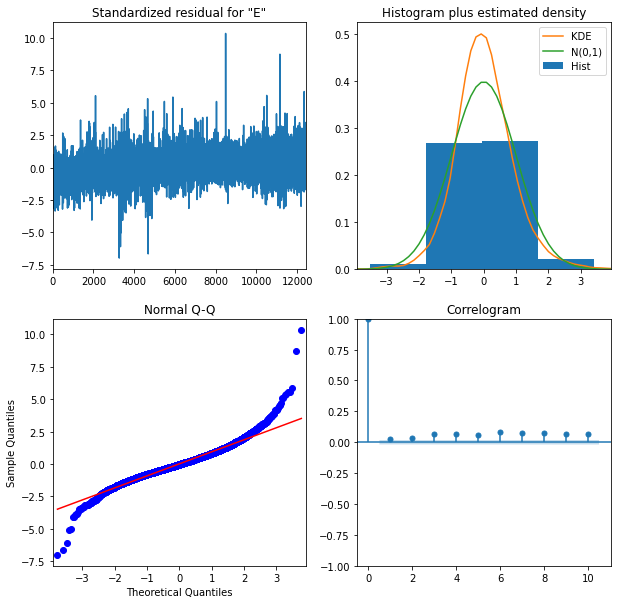

In [207]:
model_fit.plot_diagnostics(figsize=(10,10))
plt.show()

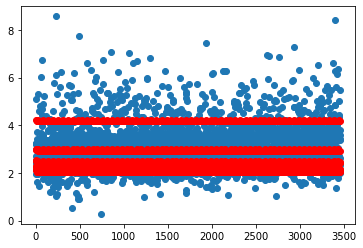

In [216]:
plt.scatter(range(len(y_test)),y_test)
plt.scatter(range(len(y_test)),y_pred,c="r")
plt.show()

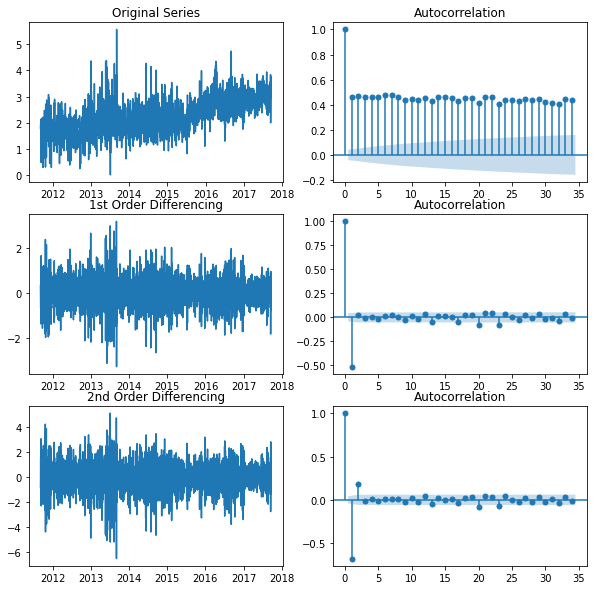

In [7]:
# Original Series

fig, axes = plt.subplots(3, 2, sharex=False, figsize=(10,10))
axes[0, 0].plot(y_train); axes[0, 0].set_title('Original Series')
plot_acf(y_train, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y_train.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y_train.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y_train.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y_train.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [8]:
y_train_diff = y_train.diff()

In [9]:
result = adfuller(y_train_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -14.597892
p-value: 0.000000


Text(0.5, 1.0, 'Partial autocorrelation')

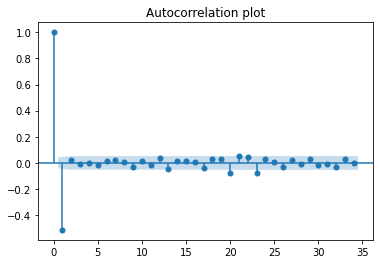

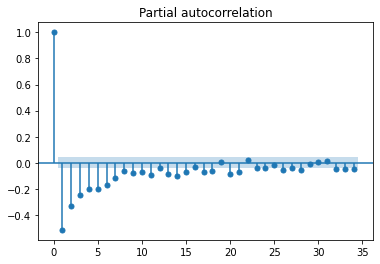

In [19]:
# Original Series

plot_acf(y_train_diff.dropna())
plt.title("Autocorrelation plot")
plot_pacf(y_train_diff.dropna())
plt.title('Partial autocorrelation')





In [19]:
model = ARIMA(y_train_diff.dropna(), order=(2,0,11))
model_fit = model.fit()
model_fit.summary()

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueW

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Energy (kWh)   No. Observations:                 2141
Model:                ARIMA(2, 0, 11)   Log Likelihood               -1517.609
Date:                Wed, 10 Mar 2021   AIC                           3065.217
Time:                        15:07:38   BIC                           3150.253
Sample:                             0   HQIC                          3096.333
                               - 2141                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      2.615      0.009       0.000       0.001
ar.L1         -0.8009      0.277     -2.893      0.004      -1.343      -0.258
ar.L2         -0.7913      0.228     -3.465      0.001      -1.239      -0.344
ma.L1         -0.1778      0.279     -0.637      0.524      -0.725       0.369
ma.L2          0.0381      0.269      0.142      0.887      -0.489       0.566
ma.L3         -0.7670      0.223     -3.443      0.001      -1.204      -0.330
ma.L4          0.0125      0.027      0.459      0.646      -0.041       0.066
ma.L5         -0.0104      0.027     -0.384      0.701      -0.063       0.042
ma.L6          0.0327      0.025      1.316      0.188      -0.016       0.081
ma.L7          0.0258      0.027      0.937      0.349      -0.028       0.080
ma.L8         -0.0058      0.028     -0.210      0.834      -0.060       0.049
ma.L9         -0.0205      0.024     -0.844      0.399      -0.068       0.027
ma.L10        -0.0561      0.022     -2.549      0.011      -0.099      -0.013
ma.L11        -0.0164      0.027     -0.603      0.547      -0.070       0.037
sigma2         0.2404      0.005     45.398      0.000       0.230       0.251
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               855.55
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

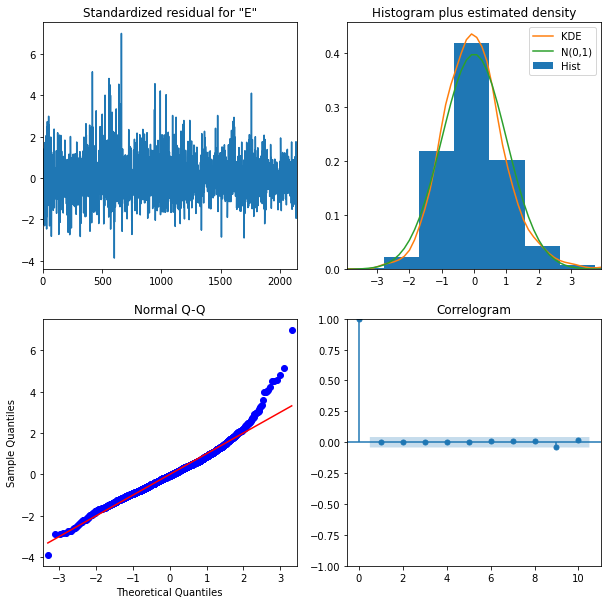

In [12]:
model_fit.plot_diagnostics(figsize=(10,10))
plt.show()

In [13]:
model = pm.auto_arima(y_train_diff.dropna(), start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=12, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3054.675, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4469.870, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3818.359, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3052.979, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3054.684, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3052.378, Time=0.83 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4471.868, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3054.162, Time=0.59 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3054.169, Time=0.95 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3820.353, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.83 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 4.365 seconds
                               SARIMAX Results                                
Dep. Variable:     